# Homework 1: Data basics 

Due: 1/12/2016

##Problem:

- Obtain the CSV (comma separated variable) file containing the counts of bicycles crossing the Fremont Bridge since 2012 (as described here).
- Create a project directory with subdirectories for data and analysis, and create a README file.
- Download the data from here. Put the it into the data directory.
- Create an iPython Notebook to analyze these data. 

In the notebook: 

 1. Isolate the 2015 data, creating fields for date, hour, and count; 
 2. use python matplotlib to plot the counts by hour; 
 3. compute the hourly average counts;
 4. determine what is the busiest hour of the day.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
data = pd.read_csv("../data/4xy5-26gy.csv", parse_dates=['date'])

In [3]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb
0,2012-10-03 02:00:00,1,1
1,2012-10-05 01:00:00,4,4
2,2012-10-05 03:00:00,2,2
3,2012-10-05 23:00:00,16,16
4,2012-10-07 22:00:00,9,9


##1. Isolate the 2015 data, creating fields for date, hour, and count;

In [4]:
data['datetime'] = data['date'].copy()

In [5]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb,datetime
0,2012-10-03 02:00:00,1,1,2012-10-03 02:00:00
1,2012-10-05 01:00:00,4,4,2012-10-05 01:00:00
2,2012-10-05 03:00:00,2,2,2012-10-05 03:00:00
3,2012-10-05 23:00:00,16,16,2012-10-05 23:00:00
4,2012-10-07 22:00:00,9,9,2012-10-07 22:00:00


In [6]:
data['date']     = data['datetime'].apply(lambda x: x.date())

In [7]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb,datetime
0,2012-10-03,1,1,2012-10-03 02:00:00
1,2012-10-05,4,4,2012-10-05 01:00:00
2,2012-10-05,2,2,2012-10-05 03:00:00
3,2012-10-05,16,16,2012-10-05 23:00:00
4,2012-10-07,9,9,2012-10-07 22:00:00


In [8]:
data['hour'] = data['datetime'].apply(lambda x: x.time().hour)

In [9]:
data.head()

,date,fremont_bridge_nb,fremont_bridge_sb,datetime,hour
0,2012-10-03,1,1,2012-10-03 02:00:00,2
1,2012-10-05,4,4,2012-10-05 01:00:00,1
2,2012-10-05,2,2,2012-10-05 03:00:00,3
3,2012-10-05,16,16,2012-10-05 23:00:00,23
4,2012-10-07,9,9,2012-10-07 22:00:00,22


In [10]:
date_hour_data = data.groupby(['date','hour']).sum()

In [12]:
date_hour_data.head()

fremont_bridge_nb  fremont_bridge_sb
date       hour                                      
2012-10-03 2                     1                  1
2012-10-05 1                     4                  4
           3                     2                  2
           23                   16                 16
2012-10-07 22                    9                  9

##2. use python matplotlib to plot the counts by hour

In [13]:
hour_data = data.groupby('hour').sum()

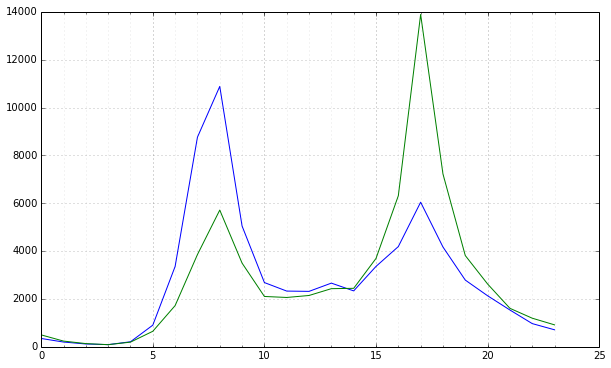

In [14]:
fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)
ax.set_xticks(range(24), minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.plot(hour_data)

 ##3. compute the hourly average counts


In [15]:
hour_mean = data.groupby('hour').mean()

In [16]:
hour_mean

,fremont_bridge_nb,fremont_bridge_sb
hour,,
0,7.102041,10.163265
1,4.061224,4.877551
2,2.744186,3.116279
3,2.116279,2.069767
4,4.565217,4.239130
5,19.255319,13.808511
6,84.000000,43.075000
7,213.756098,94.073171
8,279.205128,146.589744


##4. Determine what is the busiest hour of the day

In [17]:
hour_mean.sort('fremont_bridge_nb', ascending=False).head(5)

,fremont_bridge_nb,fremont_bridge_sb
hour,,
8,279.205128,146.589744
7,213.756098,94.073171
17,151.150000,347.450000
9,126.250000,87.475000
18,115.916667,200.750000


In [18]:
hour_mean.sort('fremont_bridge_sb', ascending=False).head(5)

,fremont_bridge_nb,fremont_bridge_sb
hour,,
17,151.150000,347.450000
18,115.916667,200.750000
16,110.289474,166.210526
8,279.205128,146.589744
19,75.405405,103.108108
